# Práctica FIFA

Queremos predecir el *valor* de los jugadores usando la información de los mismos.

**El repositorio de github es: https://github.com/MasLegend/FIFA-Aprenentatge-Inteligent**

## Importación de librerías

Lo primero será cargar las librerías que se usaran en el análisis.

In [1]:
import os

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
from matplotlib.collections import EllipseCollection
import pandas as pd
import math
import numpy as np

## Lectura de los datos
Para la lectura de los datos se usara ``pandas`` y la utilidad de la librería ``os``.

In [2]:
df = pd.read_csv(os.path.join("in", "fifa.csv"))
pd.set_option('display.max_columns', None) # Eliminamos el límite de columnas
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Análisis de los datos
Lo primero es ver la naturaleza de estos. Viendo las columnas se ve que hay presente dós tipos de columnas:

* **Continuas:** como la variable Age y Overall.
* **Categóricas:** estas variables estan como texto, algunas serían Nationality o Club.

Primero vamos a ver como estan clasificados los tipos en el data frame.

In [3]:
pd.unique(df.dtypes) 

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

Por lo que vemos las variables númericas estan con los tipos int64 y float64 y las variables categóricas como 'O' de object. Por lo que vemos las variables númericas estan con los tipos int64 y float64 y las variables categóricas como 'O' de object. 

In [4]:
df.describe() # El describe por defecto solo útiliza las númericas

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

De este resumen se sacan las siguientes conclusiones:

* La variable Unnamed:0 e ID son variables que sirven para identificar al jugador, debido a esto no serviran en el modelo por lo que las podemos eliminar.
* Mediante la fila count vemos que hay una serie de variables con valores perdidos.

In [5]:
df = df.drop(["Unnamed: 0", "ID"], axis=1)

In [6]:
df.describe(include = ['O'])

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,17194,18207,164,164,651,679,217,144,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/224335.png,England,https://cdn.sofifa.org/flags/14.png,AS Monaco,https://cdn.sofifa.org/teams/2/light/110.png,€1.1M,€1K,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


Las conclusiones sacadas mediante la salida de la función describe son:

* La variable Name y Photo son como variables identificadoras de cada jugador por lo que las podemos eliminar
* Las variables categorícas con demasiadas categorías se van a eliminar:
    * Club
    * CLub Logo
    * Nationality
    * Flag
    * Loaned From
* Hay una serie de que deberían ser númericas: Value, Wage, Height, Weight y ReleaseClause.
* Las variables asociadas con la puntuación en una posición se debería interpretar ya que actualmente es un string con una suma. Estas variables son LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB.
* Tenemos una variable fecha de entrada (Joined) con dia més y año con demasiados valores. Habrá que convertirla a variable continua, para ello se calcularan los días que han pasado hasta una fecha dada. Pra Contract Valid Until se haría igual. Debido a que no creo que tenga relevancía con el precio se eliminaran.
* Al igual que con las continuas hay valores perdidos para algunas variables.

In [7]:
df = df.drop(["Name", "Photo", "Club", "Club Logo", "Loaned From", 
              "Nationality", "Flag", "Joined", "Contract Valid Until"], axis=1)

In [8]:
def money_to_float(x):
    """
    From K and M to float.
    
    """
    if type(x) != str and math.isnan(x):
        return float("NaN")
    x = x.replace('€', '')
    ret_val = 0.0
    
    if type(x) == float or type(x) == int:
        ret_val = x
    if 'K' in x:
        if len(x) > 1:
            ret_val = float(x.replace('K', ''))
        ret_val = ret_val *1000
    if 'M' in x:
        if len(x) > 1:
            ret_val = float(x.replace('M', ''))
        ret_val = ret_val * 1000000.0
    return ret_val

df["Value"] = df["Value"].apply(money_to_float)
df["Wage"] = df["Wage"].apply(money_to_float)
df["Release Clause"] = df["Release Clause"].apply(money_to_float)

In [9]:
def str_expresion_to_float(x):
    """
    From str expresion to float
    
    """
    if type(x) != str and math.isnan(x):
        return float("NaN")
    return eval(x)

position_columns = df.columns[17:43]
for column in position_columns:
    df[column] = df[column].apply(str_expresion_to_float)

In [10]:
def remove_lbs(x):
    """
    Remove lbs from str and returns float
    
    """
    if type(x) != str and math.isnan(x):
        return float("NaN")
    x = x.replace('lbs', '')
    return float(x)
    
df["Weight"] = df["Weight"].apply(remove_lbs)

In [11]:
def foot_inches_to_meters(x):
    """
    foot and inches to meters
    
    """
    if type(x) != str and math.isnan(x):
        return float("NaN")
    foot_inches = [float(i) for i in x.split("'")]
    
    meters = foot_inches[0] * 0.3048
    if(len(foot_inches) == 2):
        meters = meters + (foot_inches[1] * 0.0254)
    
    return meters

df["Height"] = df["Height"].apply(foot_inches_to_meters)

Una vez corregidos todos los errores vamos a revisar que las variables que hemos pasado como númericas se han convertido correctamente.

## Tratamiento de NaN

Primero se mirara si alguna variable o observación tiene más de un 50% de NaN para eliminarlas.

In [12]:
df.columns[df.isna().mean() > 0.5].tolist()

[]

No hay ninguna variable con más del 50% de los datos perdidos, por lo que no eliminaremos ninguna.

In [13]:
# df = df.drop(["Prop Missings"], axis=1) # Eliminamos las fechas
df["Prop Missings"] = df.isnull().mean(axis=1)
df["Prop Missings"].describe()

count    18207.000000
mean         0.040811
std          0.114467
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.923077
Name: Prop Missings, dtype: float64

Vemos que tenemos jugadores con más del 50% de los datos perdidos. Asi que vamos a eliminarlos.

In [14]:
df = df.drop(df[df["Prop Missings"] >= 0.5].index)

In [15]:
df.shape[0]

18159

Hemos pasado de tener 18207 a 18159.
A continuación vamos a imputar los valores perdidos de las variables númericas. Para ello crearemos una función que en función de la simetria de la variable cambiara los valores perdidos por la media o la mediana.

In [16]:
def ImputationCuant(var):
    """
    NaN to meadian or mean
    
    """
    if var.dtype == 'O':
        return var
    var_skew = abs(var.skew())
    if(var_skew < 1): # Distribución simétrica
        var.loc[var != var] = var.mean()
    else: # Distribución asimétrica
        var.loc[var != var] = var.median()
    return var

df_clean = df.apply(ImputationCuant)

Para las variables categóricas miraremos la cantidad NaN que tiene. En caso de ser alta cambiaremos esos valores por una categoría nueva "Desconocido", en caso contrario imputaremos por la moda de la variable.

In [17]:
df_clean.columns[df_clean.isna().any()].tolist()

['Position']

La única variable con valores perdidos es Position. Vamos a ver cuantos valores perdidos tiene.

In [18]:
df_clean["Position"].isna().mean()

0.0006608293408227325

Al tener tan pocos datos perdidos imputaremos por la moda de esta variable.

In [19]:
df_clean.loc[df_clean["Position"] != df_clean["Position"], ["Position"]] = df_clean["Position"].mode().values[0]

In [20]:
df_clean.columns[df_clean.isna().any()].tolist()

[]

Ahora que ya no tenemos valores perdidos pasaremos a la creación de los modelos.

## Predicción

Ahora vamos a crear los modelos. Seguramente las variables númericas (stats del jugador) seran las más significativas sobre la variable objetivo *value* por lo que primero probaremos un modelo solo con estas. Todos los modelos que se vayan probando se guardaran en un dataframe para luego poder hacer una comparación final.

In [21]:
val = df_clean.pop("Value")
df_clean_numeric = df_clean.select_dtypes(['number'])
df_results = pd.DataFrame(columns=["Rank", "R2-Test"])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_numeric, val, test_size=0.33, random_state=42)
reg1 = linear_model.LinearRegression().fit(X_train, y_train)
preds = reg1.predict(X_test)
print(f"El valor predecido para la primera observación es {preds[0]} y el valor real es {y_test[0]}")
print(f"Tenemos un R2 de:{r2_score(preds, y_test)}")
df_results.loc["AllNumerics"] = [len(reg1.coef_), r2_score(preds, y_test)]

El valor predecido para la primera observación es 259786.22817360936 y el valor real es 110500000.0
Tenemos un R2 de:0.9657296012629533


Ahora vamos a probar un modelo donde solo se tengan en cuenta las caracteristicas del jugador.

In [23]:
df_clean_stats = df_clean_numeric.iloc[:,37:71]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_stats, val, test_size=0.33, random_state=42)
reg2 = linear_model.LinearRegression().fit(X_train, y_train)
preds = reg2.predict(X_test)
print(f"El valor predecido para la primera observación es {preds[0]} y el valor real es {y_test[0]}")
print(f"Tenemos un R2 de:{r2_score(preds, y_test)}")
df_results.loc["Stats"] = [len(reg2.coef_), r2_score(preds, y_test)]

El valor predecido para la primera observación es 1607212.8163100332 y el valor real es 110500000.0
Tenemos un R2 de:-0.9913891779677799


Vemos que este modelo empeora mucho. Vamos a probar ahora con el mismo modelo que el principio pero quitando algunas variables que deberían guardar poca relación con el precio:

* Height
* Weight
* Prop Missings
* Jersey Number

In [25]:
df_clean_numeric_2 = df_clean_numeric.drop(["Height", "Weight", "Prop Missings", "Jersey Number"], axis = 1) 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_numeric_2, val, test_size=0.33, random_state=42)
reg3 = linear_model.LinearRegression().fit(X_train, y_train)
preds = reg3.predict(X_test)
print(f"El valor predecido para la primera observación es {preds[0]} y el valor real es {y_test[0]}")
print(f"Tenemos un R2 de:{r2_score(preds, y_test)}")
df_results.loc["ImportantNumbers"] = [len(reg3.coef_), r2_score(preds, y_test)]

El valor predecido para la primera observación es 321281.4966321001 y el valor real es 110500000.0
Tenemos un R2 de:0.9655185835595651


Se han obtenido valores muy similares al primer modelo pero eliminando 4 variables, asi que vamos a seguir eliminando variables de este modelo para ir mejorandolo. Ahora eliminaremos todas las variables relacionadas con la puntuación del jugador en una posición.

In [27]:
df_clean_numeric_3 = df_clean_numeric_2.drop(df_clean_numeric_2.columns[8:34], axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_numeric_3, val, test_size=0.33, random_state=42)
reg4 = linear_model.LinearRegression().fit(X_train, y_train)
preds = reg4.predict(X_test)
print(f"El valor predecido para la primera observación es {preds[0]} y el valor real es {y_test[0]}")
print(f"Tenemos un R2 de:{r2_score(preds, y_test)}")
df_results.loc["AllNumbers-Positions"] = [len(reg4.coef_), r2_score(preds, y_test)]

El valor predecido para la primera observación es 302320.02106219996 y el valor real es 110500000.0
Tenemos un R2 de:0.9654734484481114


El modelo no ha empeorado y hemos eliminado 28 variables. Vamos a seguir mirando de eliminar algunas variables. Revisaremos los coeficientas asignados a cada variable y un gráfico de correlaciones para eliminar las que esten altamente correlaciondas.

In [29]:
pd.DataFrame(data = {"Coef": reg4.coef_}, index = df_clean_numeric_3.columns)

,Coef
Age,-78002.583456
Overall,80902.580102
Potential,-23039.814566
Wage,44.266285
Special,-6134.204911
International Reputation,678537.372379
Weak Foot,14321.310822
Skill Moves,131469.415382
Crossing,2932.786256
Finishing,5645.852695


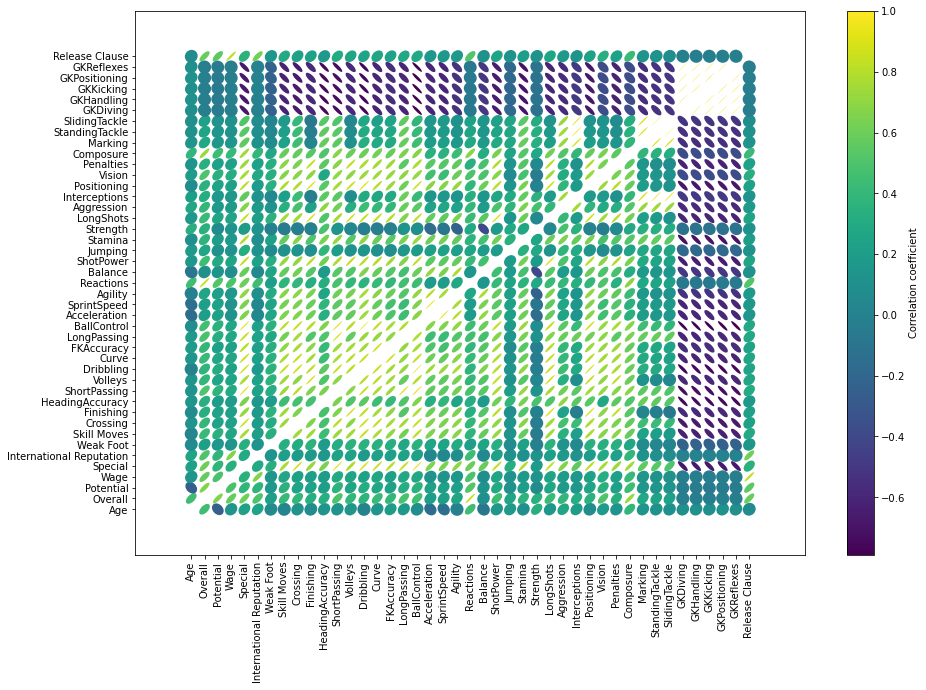

In [30]:
def plot_corr_ellipses(data, ax=None, **kwargs):
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

plt.rcParams["figure.figsize"] = (15, 10)
data = df_clean_numeric_3.corr(method = "pearson")
fig, ax = plt.subplots(1, 1)
m = plot_corr_ellipses(data, ax=ax)
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)

Vemos que hay una alta correlación entre los siguientes grupos de variables:

* GKReflexes, GKPositioning, GKKicking, GKHandling, GKDiving: tienen una correlación cercana al 1: por lo que nos quedaremos con una de estas, en este caso la GKReflexes.
* Todas las variables relacionadas con las estadisticas ya que un resumen de estas aparecen en SPeacila, Potential y Overall.

In [31]:
df_clean_numeric_4 = df_clean_numeric_3.drop(df_clean_numeric_3.columns[8:41], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_numeric_4, val, test_size=0.33, random_state=42)
reg5 = linear_model.LinearRegression().fit(X_train, y_train)
preds = reg5.predict(X_test)
print(f"El valor predecido para la primera observación es {preds[0]} y el valor real es {y_test[0]}")
print(f"Tenemos un R2 de:{r2_score(preds, y_test)}")
df_results.loc["AllNumbers-HighCorr"] = [len(reg5.coef_), r2_score(preds, y_test)]

El valor predecido para la primera observación es 414425.02718255715 y el valor real es 110500000.0
Tenemos un R2 de:0.9651627746817562


Seguimos mantienendo un alto R2. Por lo que hemos reducido en gran cantidad el número de variables del modelo mantienendo un R2 cercano al 1. Volveremos a mirar los coeficientes y las correlaciones para ver si podemos eliminar algunas más.

In [33]:
pd.DataFrame(data = {"Coef": reg5.coef_}, index = df_clean_numeric_4.columns)

,Coef
Age,-74855.462525
Overall,84096.624980
Potential,-26328.411315
Wage,43.892116
Special,-312.940921
International Reputation,678958.860308
Weak Foot,34209.231337
Skill Moves,181511.138527
GKReflexes,2251.584743
Release Clause,0.396959


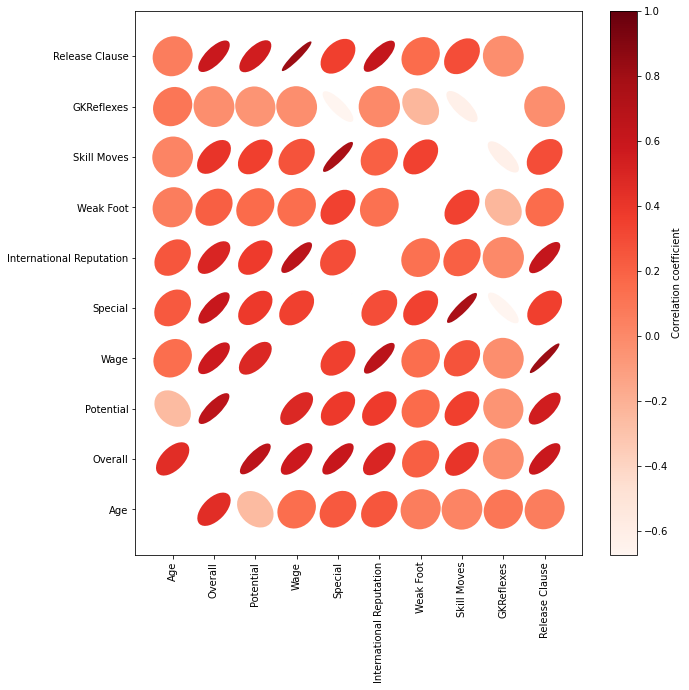

In [34]:
plt.rcParams["figure.figsize"] = (10, 10)
data = df_clean_numeric_4.corr(method = "pearson")
fig, ax = plt.subplots(1, 1)
m = plot_corr_ellipses(data, ax=ax, cmap='Reds')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)

Aun seguimos teniendo una alta correlación entre algunas variables, por lo que tendremos que eliminarlas.

In [35]:
df_clean_numeric_5 = df_clean_numeric_4.drop(["Potential", "Special"], axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_clean_numeric_5, val, test_size=0.33, random_state=42)
reg6 = linear_model.LinearRegression().fit(X_train, y_train)
preds = reg6.predict(X_test)
print(f"El valor predecido para la primera observación es {preds[0]} y el valor real es {y_test[0]}")
print(f"Tenemos un R2 de:{r2_score(preds, y_test)}")
df_results.loc["AllNumbers-HighCorr2"] = [len(reg6.coef_), r2_score(preds, y_test)]

El valor predecido para la primera observación es 410163.6304121353 y el valor real es 110500000.0
Tenemos un R2 de:0.9649691940705387


Ahora que ya hemos reducido mucho el número de variables vamos a mirar con que modelo quedarnos revisando su rango y su R^2.

In [37]:
df_results

,Rank,R2-Test
AllNumerics,73.0,0.965730
Stats,34.0,-0.991389
ImportantNumbers,69.0,0.965519
AllNumbers-Positions,43.0,0.965473
AllNumbers-HighCorr,10.0,0.965163
AllNumbers-HighCorr2,8.0,0.964969


Del data frame sacamos las siguientes conclusiones:

* El modelo con solo las estadisticas tiene un R^2 negativo por lo que lo descartamos.
* El resto de modelo mantienen un valor de R^2 cercano al 0.96, un valor realmente alto. Asi que nos quedaremos con el que tenga menos variables, en este caso el **AllNumbers-HighCorr2**.

Para finalizar se mostraran los coeficientes del modelo ganador.

In [38]:
pd.DataFrame(data = {"Coef": reg6.coef_}, index = df_clean_numeric_5.columns)

,Coef
Age,-51507.852949
Overall,56055.535836
Wage,43.867361
International Reputation,644456.271103
Weak Foot,26578.792069
Skill Moves,157939.709697
GKReflexes,4367.118549
Release Clause,0.397363
